In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df_nat = pd.read_csv("mhc_nature.tsv", sep="\t")
df_nat["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_nat["mhc"]))
df_nat.head()

,mhc,pseudo
0,HLAA0101,MYFFAVGFVRFMYQERNMAHTDANTLYIQIYRDYIWITKWVAQRYRGY
1,HLAA0201,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAVQLYTWY
2,HLAA0202,MYFFAVGFVRFMYGERKVAHTHVDTLYLQRYHYYIWTTKWAVQWYTWY
3,HLAA0203,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAEQWYTWY
4,HLAA0204,MYFFAVGFVRFMYGERKVAHTHVDTLYVQMYHYYIWTTKWAVQLYTWY


In [3]:
df_our = pd.read_csv("mhc_seq_imghtla.csv")
df_our.head()

,Unnamed: 0,mhc,sequence,pseudo
0,0,HLAA0201,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSHRDLLRYNMGQADKEHARYLCLL
1,1,HLAA0211,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRDLLRYNMGQADKEHARYLCLL
2,2,HLAA2402,SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRNLALYNMGQADKEHARYLCLL
3,3,HLAA8001,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDSQFVQFDSDAASQRMEP...,FTVEWETVKHSNRNLLRYNMGQADKERARYLCLL
4,4,HLAA3001,SHSMRYFSTSVSRPGSGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKQSDRDLLRYNMGQADQERARYLCLL


In [4]:
print(df_our.shape)
print(df_nat.shape)
len(set(df_our["mhc"]).intersection(set(df_nat["mhc"])))

(103, 4)
(135, 2)


95

In [5]:
set(df_our["mhc"]).difference(set(df_nat["mhc"]))

{'HLAA7401',
 'HLAB1401',
 'HLAB4202',
 'HLAC0303',
 'HLAC0501',
 'HLAC0802',
 'HLAC1203',
 'HLAC1502'}

In [6]:
set(df_nat["mhc"]).difference(set(df_our["mhc"]))

{'HLAA0208',
 'HLAA0209',
 'HLAA0214',
 'HLAA3003',
 'HLAA3004',
 'HLAA3303',
 'HLAA6602',
 'HLAA6603',
 'HLAB1301',
 'HLAB1403',
 'HLAB1508',
 'HLAB1510',
 'HLAB1512',
 'HLAB1516',
 'HLAB2707',
 'HLAB2709',
 'HLAB3502',
 'HLAB3909',
 'HLAB3910',
 'HLAB4101',
 'HLAB4102',
 'HLAB4103',
 'HLAB4104',
 'HLAB4105',
 'HLAB4405',
 'HLAB4408',
 'HLAB4427',
 'HLAB4701',
 'HLAB4901',
 'HLAB5001',
 'HLAB5102',
 'HLAB5103',
 'HLAB5501',
 'HLAB5502',
 'HLAB5601',
 'HLAC0102',
 'HLAC0304',
 'HLAC0701',
 'HLAC0801',
 'HLAC1601'}

In [7]:
df_thr = pd.read_csv("bind_thr.csv")
# df_thr["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_thr["Allele"]))
# df_thr.drop("mhc", 1, inplace=True)
df_thr

,Unnamed: 0,Freq,Thr,mhc
0,0,16.2,884,HLAA0101
1,1,25.2,255,HLAA0201
2,2,3.3,92,HLAA0203
3,3,4.9,60,HLAA0206
4,4,15.4,602,HLAA0301
5,5,12.9,382,HLAA1101
6,6,6.4,740,HLAA2301
7,7,16.8,849,HLAA2402
8,8,2.5,795,HLAA2501
9,9,4.7,815,HLAA2601


In [8]:
def hamm(seq1, seq2):
    res = 0
    for a,b in zip(seq1, seq2):
        res += a != b
    return res


dist = np.zeros((df_thr.shape[0], df_thr.shape[0]))
diff = np.zeros((df_thr.shape[0], df_thr.shape[0]))
for i in range(dist.shape[0]):
    for j in range(i, dist.shape[0]):
        seq1 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][i], "pseudo"].iloc[0]
        seq2 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][j], "pseudo"].iloc[0]
        dist[i,j] = hamm(seq1, seq2)
        dist[j,i] = dist[i,j]
        diff[i,j] = df_thr["Thr"][i] - df_thr["Thr"][j]
        diff[j,i] = df_thr["Thr"][j] - df_thr["Thr"][i]
        
diff

array([[   0.,  629.,  792., ...,  346.,  168.,  438.],
       [-629.,    0.,  163., ..., -283., -461., -191.],
       [-792., -163.,    0., ..., -446., -624., -354.],
       ..., 
       [-346.,  283.,  446., ...,    0., -178.,   92.],
       [-168.,  461.,  624., ...,  178.,    0.,  270.],
       [-438.,  191.,  354., ...,  -92., -270.,    0.]])

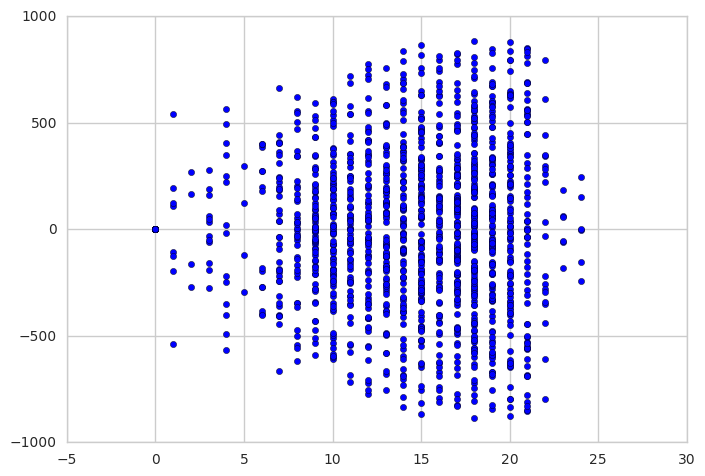

In [16]:
plt.scatter(dist, diff)

In [ ]:
def read_df(filepath):
    df = pd.read_table(filepath, sep="\t")

    df.loc[df.meas > 50000, "meas"] = 50000
    df.meas = 1 - np.log(df.meas) / np.log(50000)
    
    df.mhc = list(map(lambda x: x.replace("-", ""), df.mhc))
    df.mhc = list(map(lambda x: x.replace(":", ""), df.mhc))
    df.mhc = list(map(lambda x: x.replace("*", ""), df.mhc))

    df.loc[df.mhc == "HLAA1", "mhc"] = "HLAA0101"
    df.loc[df.mhc == "HLAA11", "mhc"] = "HLAA0101"
    df.loc[df.mhc == "HLAA2", "mhc"] = "HLAA0201"
    df.loc[df.mhc == "HLAA3", "mhc"] = "HLAA0319"
    df.loc[df.mhc == "HLAA3/11", "mhc"] = "HLAA0319"
    df.loc[df.mhc == "HLAA26", "mhc"] = "HLAA2602"
    df.loc[df.mhc == "HLAA24", "mhc"] = "HLAA2403"

    df.loc[df.mhc == "HLAB44", "mhc"] = "HLAB4402"
    df.loc[df.mhc == "HLAB51", "mhc"] = "HLAB5101"
    df.loc[df.mhc == "HLAB7", "mhc"] = "HLAB0702"
    df.loc[df.mhc == "HLAB27", "mhc"] = "HLAB2720"
    df.loc[df.mhc == "HLAB8", "mhc"] = "HLAB0801"

    df.loc[df.mhc == "HLACw1", "mhc"] = "HLAC0401"
    df.loc[df.mhc == "HLACw4", "mhc"] = "HLAC0401"

    df = df.loc[df.mhc != "HLAB60", :]
    
    df = df.ix[df["mhc"] == "HLAA8001", ]
    
    return df

df1 = read_df("bdata.2009.tsv")
df2 = read_df("blind.tsv")

In [ ]:
df1.head()

In [ ]:
sns.distplot(df1["meas"])
sns.distplot(df2["meas"])

In [ ]:
df1.shape

In [ ]:
df2.shape

In [ ]:
set(df1["sequence"]).intersection(df2["sequence"])

In [ ]:
pred_old = pred
pred2_old = pred2

pred = [float(x) for x in open("../models_local/cnn.128.64_bal/pred.txt")]
pred2 = [float(x) for x in open("../models_local/cnn.128.64_bal/pred_tr.txt")]

fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(12)
ax[0].scatter(df2["meas"], pred, c="dodgerblue", alpha=.8)
ax[0].scatter(df2["meas"], pred_old, c="red", alpha=.8)
ax[1].scatter(df1["meas"], pred2, c="dodgerblue", alpha=.8)
ax[1].scatter(df1["meas"], pred2_old, c="red", alpha=.8)
ax[2].scatter(pred2, pred2_old, c="red", alpha=.5)
ax[2].scatter(pred, pred_old, c="dodgerblue", alpha=.5)

ax[0].set_title("test")
ax[1].set_title("train")
ax[2].set_title("pred ~ cur")

In [9]:
df_merged = pd.merge(df_nat, df_thr, on="mhc")
df_merged.head()

,mhc,pseudo,Unnamed: 0,Freq,Thr
0,HLAA0101,MYFFAVGFVRFMYQERNMAHTDANTLYIQIYRDYIWITKWVAQRYRGY,0,16.2,884
1,HLAA0201,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAVQLYTWY,1,25.2,255
2,HLAA0203,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAEQWYTWY,2,3.3,92
3,HLAA0206,MYYFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAVQLYTWY,3,4.9,60
4,HLAA0301,MYFFAVGFVRFMYQERNVAQTDVDTLYIQIYRDYIWITKWAEQLYTWY,4,15.4,602


In [13]:
import os
import sys
os.environ["THEANO_FLAGS"] = "lib.cnmem=0.1"
import theano
sys.setrecursionlimit(10000)

import keras
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout, Dense, Input, Conv1D, add, Flatten, GlobalAveragePooling1D
from keras.layers.advanced_activations import PReLU
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import gensim

chars = ["A", "L", "R", 'K', 'N', 'M', 'D', 'F', 'C', 'P', 'Q', 'S', 'E', 'T', 'G', 'W', 'H', 'Y', 'I', 'V']
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))


max_len = max(list(map(len, df_merged["pseudo"])))


w2v_model = gensim.models.Word2Vec.load("../w2v_models/up9mers_size_20_window_3.pkl")

def vectorize_xy(seq_vec, affin_vec, max_len, chars):
#     X = np.zeros((len(seq_vec), max_len, len(chars)), dtype=np.bool)
    X = np.zeros((len(seq_vec), max_len, 20), dtype=np.float32)
    y = affin_vec.values
    for i, seq in enumerate(seq_vec):
        for row, char in enumerate(seq):
#             X[i, row, char_indices[char]] = 1
            X[i, row, :] = w2v_model.wv[char] / np.linalg.norm(w2v_model.wv[char])
    return X, y.reshape(len(seq_vec), 1)

X, y = vectorize_xy(df_merged["pseudo"], df_merged["Thr"], max_len, chars)

In [ ]:
def build_rnncnn():
    model = Sequential()
    model.add(Conv1D(64, 1, input_shape=(max_len,20)))
    model.add(Bidirectional(GRU(64, 
                                kernel_initializer="he_normal", recurrent_initializer="he_normal", 
                                bias_initializer="he_normal",implementation=2, dropout=.2, 
                                recurrent_dropout=.2, unroll=True)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(PReLU())
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model


def build_rnn1():
    model = Sequential()
    model.add(Bidirectional(GRU(32, 
                                kernel_initializer="he_normal", recurrent_initializer="he_normal", 
                                bias_initializer="he_normal",implementation=2, dropout=.2, 
                                recurrent_dropout=.2, unroll=True), input_shape=(max_len,20)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Dense(96))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(PReLU())
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model


def build_rnn2():
    model = Sequential()
    model.add(Bidirectional(GRU(16, 
                                kernel_initializer="he_normal", recurrent_initializer="he_normal", 
                                bias_initializer="he_normal",implementation=2, dropout=.2, 
                                recurrent_dropout=.2, unroll=True), input_shape=(max_len,20)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(PReLU())
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model


def build_rnn3():
    model = Sequential()
    model.add(Bidirectional(GRU(16, 
                                kernel_initializer="he_normal", recurrent_initializer="he_normal", 
                                bias_initializer="he_normal",implementation=2, dropout=.2, 
                                recurrent_dropout=.2, unroll=True), input_shape=(max_len,20)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Dense(96))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(PReLU())
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model


def build_cnn1():
    def _block(prev_layer, shape):
        shortcut = BatchNormalization()(prev_layer)
        shortcut = PReLU()(shortcut)
        
        branch = Conv1D(64, 1, kernel_initializer="he_normal")(shortcut)
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Dropout(.3)(branch)
        
        branch = Conv1D(shape[1], 1, kernel_initializer="he_normal")(branch)
        
        shortcut = Conv1D(shape[1], 1, kernel_initializer="he_normal")(shortcut)
        return add([shortcut, branch])

    char_dim=20
    pep_in = Input(shape=(max_len, 20))

    pep_in = Input(shape=(max_len, char_dim))
    pep_branch = _block(pep_in, (max_len, char_dim))
    pep_branch = _block(pep_branch, (max_len, char_dim))
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = GlobalAveragePooling1D()(pep_branch)

    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)

    pep_branch = Dense(1)(pep_branch)
    pred = PReLU()(pep_branch)

    model = Model(pep_in, pred)
    model.compile(loss='mse', optimizer="nadam")
    
    return model


def build_cnn2():
    def _block(prev_layer, shape):
        shortcut = BatchNormalization()(prev_layer)
        shortcut = PReLU()(shortcut)
        
        branch = Conv1D(64, 1, kernel_initializer="he_normal")(shortcut)
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Dropout(.3)(branch)
        
        branch = Conv1D(shape[1], 1, kernel_initializer="he_normal")(branch)
        
        shortcut = Conv1D(shape[1], 1, kernel_initializer="he_normal")(shortcut)
        return add([shortcut, branch])

    char_dim=20
    pep_in = Input(shape=(max_len, 20))

    pep_in = Input(shape=(max_len, char_dim))
    pep_branch = _block(pep_in, (max_len, char_dim))
    pep_branch = _block(pep_branch, (max_len, char_dim))
    pep_branch = _block(pep_branch, (max_len, char_dim))
    pep_branch = _block(pep_branch, (max_len, char_dim))
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = GlobalAveragePooling1D()(pep_branch)

    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)

    pep_branch = Dense(1)(pep_branch)
    pred = PReLU()(pep_branch)

    model = Model(pep_in, pred)
    model.compile(loss='mse', optimizer="nadam")
    
    return model

models = [build_rnncnn(), build_rnn1(), build_rnn2(), build_rnn3(), build_cnn1(), build_cnn2()]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


preds_tra = []
preds_tst = []
hists = []
for i in range(len(models)):
    print(i)
    step = 5000
    hist = models[i].fit(X_train, y_train, validation_split=.2, epochs=step*8, verbose=0,
                     callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, 
                                                  cooldown=1, min_lr=0.0005)])
    hists.append(hist)
    preds_tra.append(models[i].predict(X_train))
    preds_tst.append(models[i].predict(X_test))

0
1
2
3


In [19]:
def plot_pred(i, ax, title):
    ax.scatter(preds_tra[i], y_train, c="dodgerblue")
    ax.scatter(preds_tst[i], y_test, c="red")
    ax.set_title("pred~real, " + title)
    ax.plot([0,1000], [0,1000], "k")

def plot_hist(i, ax, title):
    ax.plot(hists[i].history["loss"][5000:], label="loss")
    ax.plot(hists[i].history["val_loss"][5000:], label="val_loss")
    ax.legend()
    ax.set_title("loss, " + title)

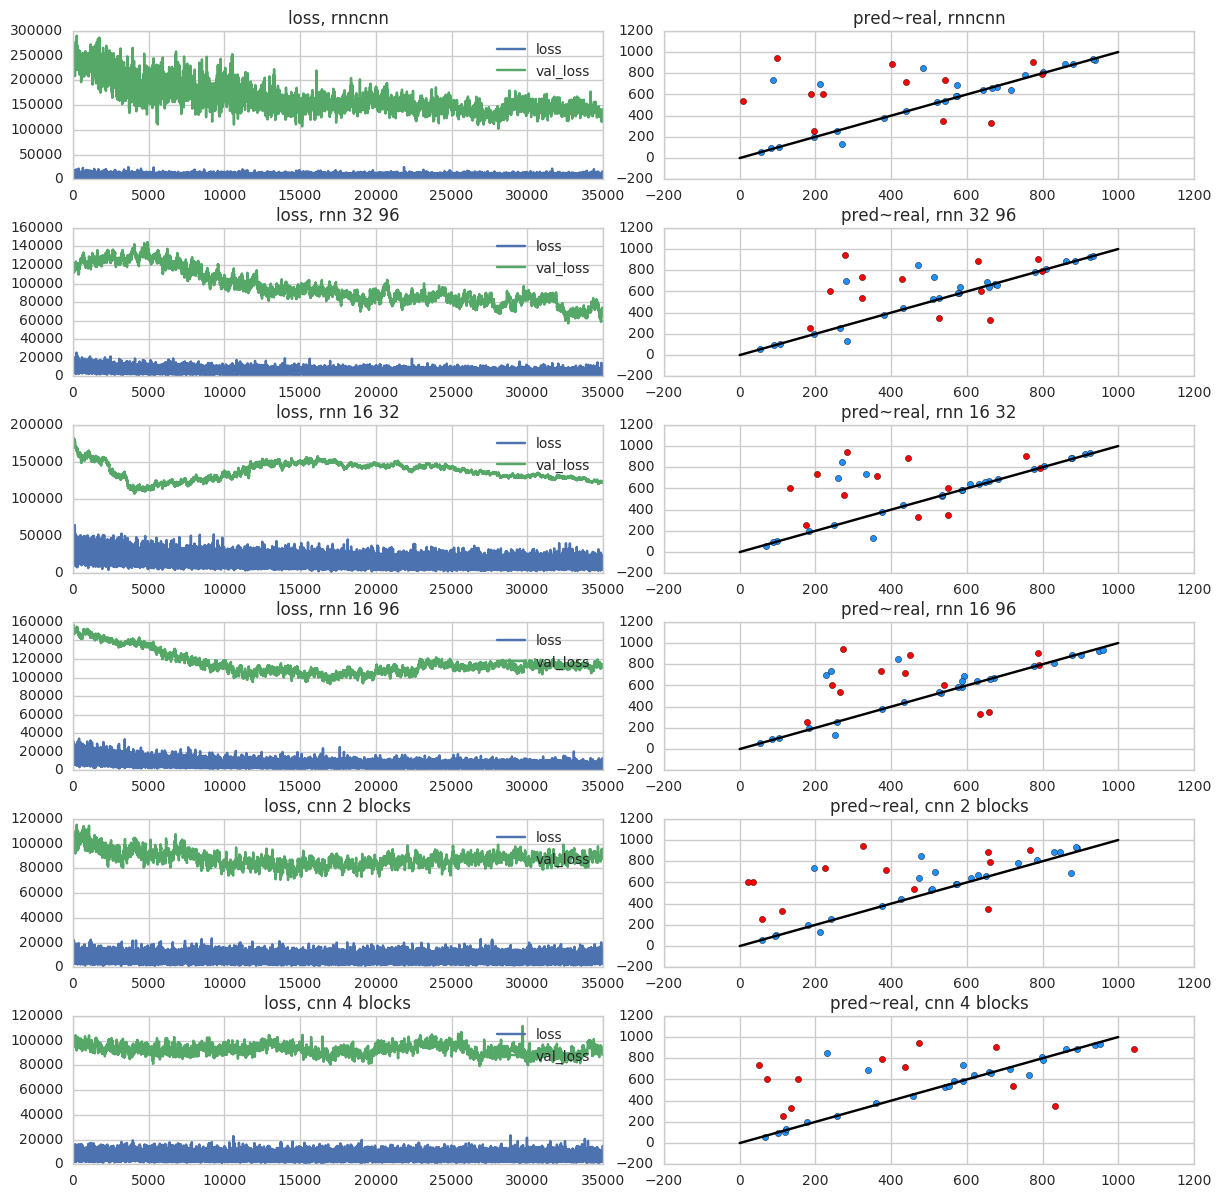

In [22]:
fig, ax = plt.subplots(ncols=2, nrows=len(models))
fig.set_figwidth(12)
fig.set_figheight(12)

fig.tight_layout()

titles = ["rnncnn", "rnn 32 96", "rnn 16 32", "rnn 16 96", "cnn 2 blocks", "cnn 4 blocks"]
for i in range(len(models)):    
    plot_hist(i, ax[i][0], titles[i])
    plot_pred(i, ax[i][1], titles[i])

In [23]:
preds_tra_old = preds_tra
preds_tst_old = preds_tst
hists_old = hists
models_old = models

In [27]:
def build_rnn4():
    model = Sequential()
    model.add(Bidirectional(GRU(64, 
                                kernel_initializer="he_normal", recurrent_initializer="he_normal", 
                                bias_initializer="he_normal",implementation=2, dropout=.2, 
                                recurrent_dropout=.2, unroll=True), input_shape=(max_len,20)))
    model.add(BatchNormalization())
    model.add(PReLU())

    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))
    
    model.add(Dense(64))
    model.add(BatchNormalization())
    model.add(PReLU())
    model.add(Dropout(.5))

    model.add(Dense(1))
    model.add(PReLU())
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model


def build_cnn3():
    def _block(prev_layer, shape):
        shortcut = BatchNormalization()(prev_layer)
        shortcut = PReLU()(shortcut)
        
        branch = Conv1D(64, 1, kernel_initializer="he_normal")(shortcut)
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Dropout(.3)(branch)
        
        branch = Conv1D(shape[1], 1, kernel_initializer="he_normal")(branch)
        
        shortcut = Conv1D(shape[1], 1, kernel_initializer="he_normal")(shortcut)
        return add([shortcut, branch])

    char_dim=20
    pep_in = Input(shape=(max_len, 20))

    pep_branch = _block(pep_in, (max_len, char_dim))
    pep_branch = _block(pep_branch, (max_len, char_dim))
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    
    pep_branch = Flatten()(pep_branch)

    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)
    
    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)

    pep_branch = Dense(1)(pep_branch)
    pred = PReLU()(pep_branch)

    model = Model(pep_in, pred)
    model.compile(loss='mse', optimizer="nadam")
    
    return model


def build_cnn4():
    def _block(prev_layer, shape, mid_filters):
        branch = BatchNormalization()(prev_layer)
        branch = PReLU()(branch)
        branch = Conv1D(mid_filters[0], 1, kernel_initializer="he_normal")(branch)
        branch = Dropout(.3)(branch)
        
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Conv1D(mid_filters[1], 1, kernel_initializer="he_normal")(branch)
        branch = Dropout(.3)(branch)
        
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Conv1D(shape[1], 1, kernel_initializer="he_normal")(branch)
        return add([prev_layer, branch])
    
    pep_in = Input(shape=(9,20))
    pep_branch = _block(pep_in, (9,20), [64, 128])
    pep_branch = _block(pep_branch, (9,20), [128, 196])
    
    pep_branch = Flatten()(pep_branch)
    
    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)
    
    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)
    
    pep_branch = Dense(1)(pep_branch)
    pred = PReLU()(pep_branch)

    model = Model(pep_in, pred)
    model.compile(loss='mse', optimizer="nadam")
        
    return model


def build_cnn5():
    def _block(prev_layer, in_filters, out_filters):
        shortcut = BatchNormalization()(prev_layer)
        shortcut = PReLU()(shortcut)
        
        branch = Conv1D(in_filters, 1, kernel_initializer="he_normal")(shortcut)
        branch = BatchNormalization()(branch)
        branch = PReLU()(branch)
        branch = Dropout(.3)(branch)
        
        branch = Conv1D(out_filters, 1, kernel_initializer="he_normal")(branch)
        
        shortcut = Conv1D(out_filters, 1, kernel_initializer="he_normal")(shortcut)
        return add([shortcut, branch])

    char_dim=20
    
    pep_in = Input(shape=(max_len, char_dim))
    pep_branch = _block(pep_in, 64, 128)
    pep_branch = _block(pep_branch, 128, 196)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    
    pep_branch = Flatten()(pep_branch)

    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)
    
    pep_branch = Dense(64, kernel_initializer="he_normal")(pep_branch)
    pep_branch = BatchNormalization()(pep_branch)
    pep_branch = PReLU()(pep_branch)
    pep_branch = Dropout(.5)(pep_branch)

    pep_branch = Dense(1)(pep_branch)
    pred = PReLU()(pep_branch)

    model = Model(pep_in, pred)
    model.compile(loss='mse', optimizer="nadam")
    
    return 


models = [build_rnn1(), build_rnn4(), build_cnn3(), build_cnn4(), build_cnn5()]

In [ ]:
preds_tra = []
preds_tst = []
hists = []
for i in range(len(models)):
    print(i)
    step = 5000
    hist = models[i].fit(X_train, y_train, validation_split=.2, epochs=step*20, verbose=0,
                     callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, 
                                                  cooldown=1, min_lr=0.0005)])
    hists.append(hist)
    preds_tra.append(models[i].predict(X_train))
    preds_tst.append(models[i].predict(X_test))

0


In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=len(models), sharey=True)
fig.set_figwidth(12)
fig.set_figheight(12)

fig.tight_layout()

titles = ["rnn 32 96", "rnn 64 64+64", "cnn 4 blocks 64+64", "classic resnetcnn 64+64", "cnn grow"]
for i in range(len(models)):    
    plot_hist(i, ax[i][0], titles[i])
    plot_pred(i, ax[i][1], titles[i])